# Sleep Disorder 

Source of Dataset: [Sleep-health-and-lifestyle-dataset](https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset)

The `Columns` include:

|   Column                                  |   Description                                     |
|-------------------------------------------|---------------------------------------------------|
|   Person ID                               |   An identifier for each individual               |
|   Gender                                  |   The gender of the person (Male/Female)          |
|   Age                                     |   The age of the person in years                  |
|   Occupation                              |   The occupation or profession of the person      |
|   Sleep Duration (hours)                  |   The number of hours the person sleeps per day   |
|   Quality of Sleep (scale: 1-10)          |   A subjective rating of the quality of sleep, ranging from 1 to 10   |
|   Physical Activity Level (minutes/day)   |   The number of minutes the person engages in physical activity daily     |
|   Stress Level (scale: 1-10)              |   A subjective rating of the stress level experienced by the person, ranging from 1 to 10 |
|   BMI Category                            |   The BMI category of the person (e.g., Underweight, Normal, Overweight)    |
|   Blood Pressure (systolic/diastolic)     |   The blood pressure measurement of the person, indicated as systolic pressure over diastolic pressure    |
|   Heart Rate (bpm)                        |   The resting heart rate of the person in beats per minute        |
|   Daily Steps                             |   The number of steps the person takes per day                    |
|   Sleep Disorder                          |   The presence or absence of a sleep disorder in the person (None, Insomnia, Sleep Apnea) |


# Import important libraries

In [46]:
import joblib

# Basic libraries
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning libraries
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


import warnings
warnings.filterwarnings('ignore')

In [47]:
# Set random seed for reproducibility
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

# Data Loading, Preprocessing, and Exploration

# Loading Data

In [48]:
df = pd.read_csv("./Sleep_health_and_lifestyle_dataset.csv", index_col=0)
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
Person ID,,,,,,,,,,,,
1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


# Preprocessing

In [49]:
df.shape

(374, 12)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 374 entries, 1 to 374
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   374 non-null    object 
 1   Age                      374 non-null    int64  
 2   Occupation               374 non-null    object 
 3   Sleep Duration           374 non-null    float64
 4   Quality of Sleep         374 non-null    int64  
 5   Physical Activity Level  374 non-null    int64  
 6   Stress Level             374 non-null    int64  
 7   BMI Category             374 non-null    object 
 8   Blood Pressure           374 non-null    object 
 9   Heart Rate               374 non-null    int64  
 10  Daily Steps              374 non-null    int64  
 11  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(6), object(5)
memory usage: 38.0+ KB


- Presence of missing values in column `Sleep Disorder`
- Rename column names into `camelcase` format

In [51]:
# Rename column names to remove spaces
df.columns = df.columns.str.replace(' ', '_')
df.head()

,Gender,Age,Occupation,Sleep_Duration,Quality_of_Sleep,Physical_Activity_Level,Stress_Level,BMI_Category,Blood_Pressure,Heart_Rate,Daily_Steps,Sleep_Disorder
Person ID,,,,,,,,,,,,
1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [52]:
df["Sleep_Disorder"].value_counts()

Sleep_Disorder
Sleep Apnea    78
Insomnia       77
Name: count, dtype: int64

In [53]:
# Check for unique values in categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"{col}: {df[col].unique()}")

Gender: ['Male' 'Female']
Occupation: ['Software Engineer' 'Doctor' 'Sales Representative' 'Teacher' 'Nurse'
 'Engineer' 'Accountant' 'Scientist' 'Lawyer' 'Salesperson' 'Manager']
BMI_Category: ['Overweight' 'Normal' 'Obese' 'Normal Weight']
Blood_Pressure: ['126/83' '125/80' '140/90' '120/80' '132/87' '130/86' '117/76' '118/76'
 '128/85' '131/86' '128/84' '115/75' '135/88' '129/84' '130/85' '115/78'
 '119/77' '121/79' '125/82' '135/90' '122/80' '142/92' '140/95' '139/91'
 '118/75']
Sleep_Disorder: [nan 'Sleep Apnea' 'Insomnia']


In [54]:
# Check for duplicates
df.duplicated().sum()

242

- No duplicates found

In [55]:
# Check for statistics
df.describe()

,Age,Sleep_Duration,Quality_of_Sleep,Physical_Activity_Level,Stress_Level,Heart_Rate,Daily_Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


# Impute missing values

In [56]:
df["Sleep_Disorder"].fillna("None", inplace=True)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 374 entries, 1 to 374
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   374 non-null    object 
 1   Age                      374 non-null    int64  
 2   Occupation               374 non-null    object 
 3   Sleep_Duration           374 non-null    float64
 4   Quality_of_Sleep         374 non-null    int64  
 5   Physical_Activity_Level  374 non-null    int64  
 6   Stress_Level             374 non-null    int64  
 7   BMI_Category             374 non-null    object 
 8   Blood_Pressure           374 non-null    object 
 9   Heart_Rate               374 non-null    int64  
 10  Daily_Steps              374 non-null    int64  
 11  Sleep_Disorder           374 non-null    object 
dtypes: float64(1), int64(6), object(5)
memory usage: 38.0+ KB


In [58]:
# Merge `Normal` and `Normal Weight` to `Normal` in `BMI_Category` column
df['BMI_Category'] = df['BMI_Category'].replace({'Normal Weight': 'Normal'})
df['BMI_Category'].value_counts()

BMI_Category
Normal        216
Overweight    148
Obese          10
Name: count, dtype: int64

In [59]:
# Drop `Person_ID` column as it is not useful for analysis
# df.drop(columns=['Person_ID'], inplace=True)
# df.head()

In [60]:
# Unique values in `Sleep_Disorder` column
df['Sleep_Disorder'].value_counts()

Sleep_Disorder
None           219
Sleep Apnea     78
Insomnia        77
Name: count, dtype: int64

# Exploratory Data Analysis

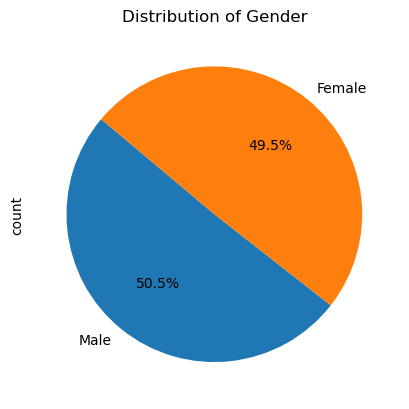

In [61]:
# Distribution of `Gender` column
df['Gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Gender')
plt.show();

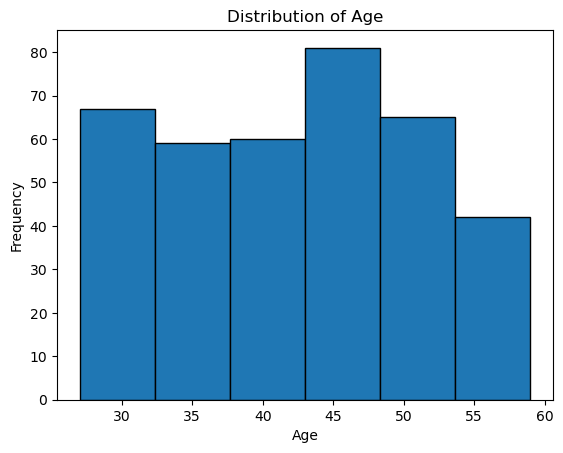

In [62]:
df['Age'].hist(bins=6, edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(False)
plt.show();

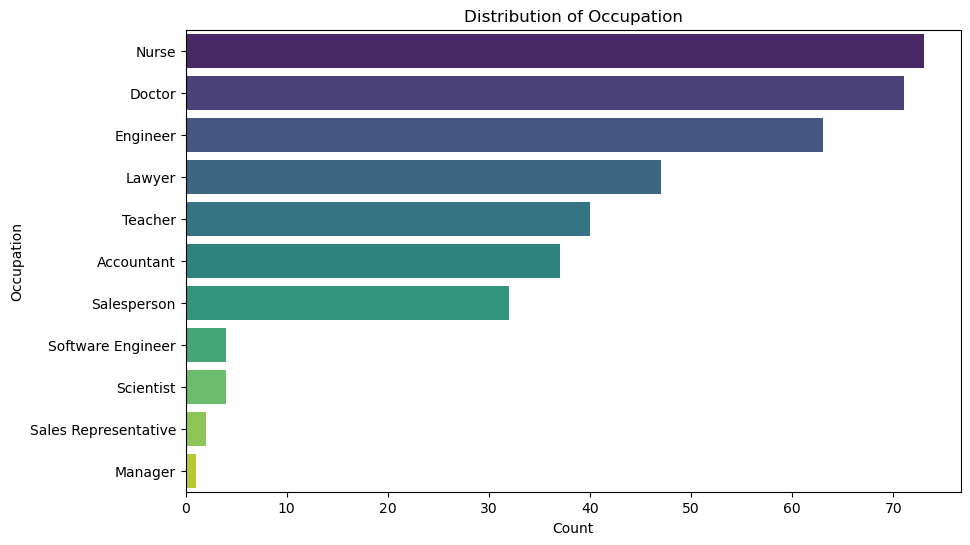

In [63]:
# Distribution of `Occupation` column
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='Occupation', order=df['Occupation'].value_counts().index, palette='viridis')
plt.title('Distribution of Occupation')
plt.xlabel('Count')
plt.ylabel('Occupation')
plt.show();

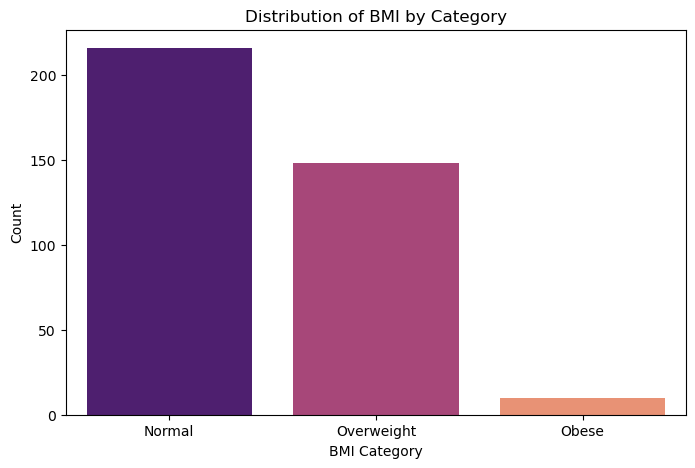

In [64]:
# Distribution of `BMI-Category` column
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='BMI_Category', order=df['BMI_Category'].value_counts().index, palette='magma')
plt.title('Distribution of BMI by Category')
plt.xlabel('BMI Category')
plt.ylabel('Count')
plt.show();

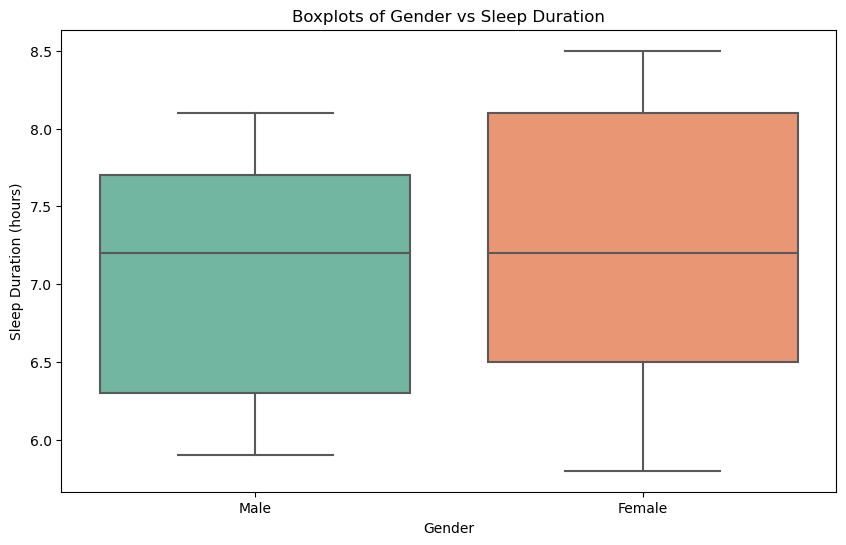

In [65]:
# Relationship between `Gender` and `Sleep_Durations`
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Gender', y='Sleep_Duration', palette='Set2')
plt.title('Boxplots of Gender vs Sleep Duration')
plt.xlabel('Gender')
plt.ylabel('Sleep Duration (hours)')
plt.show();

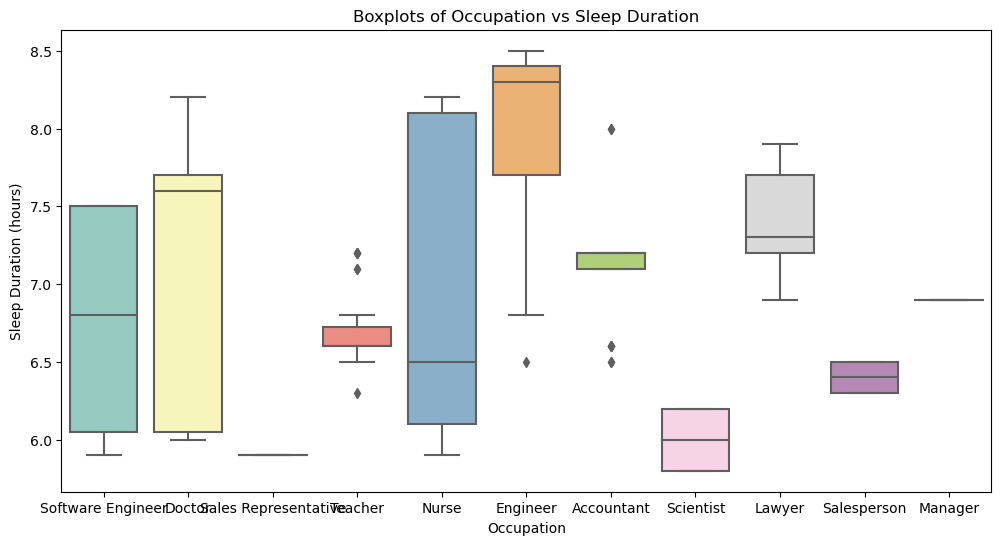

In [66]:
# Relationship between `Occupation` and `Sleep_Duration`
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Occupation', y='Sleep_Duration', palette='Set3')
plt.title('Boxplots of Occupation vs Sleep Duration')
plt.xlabel('Occupation')
plt.ylabel('Sleep Duration (hours)')
plt.show();

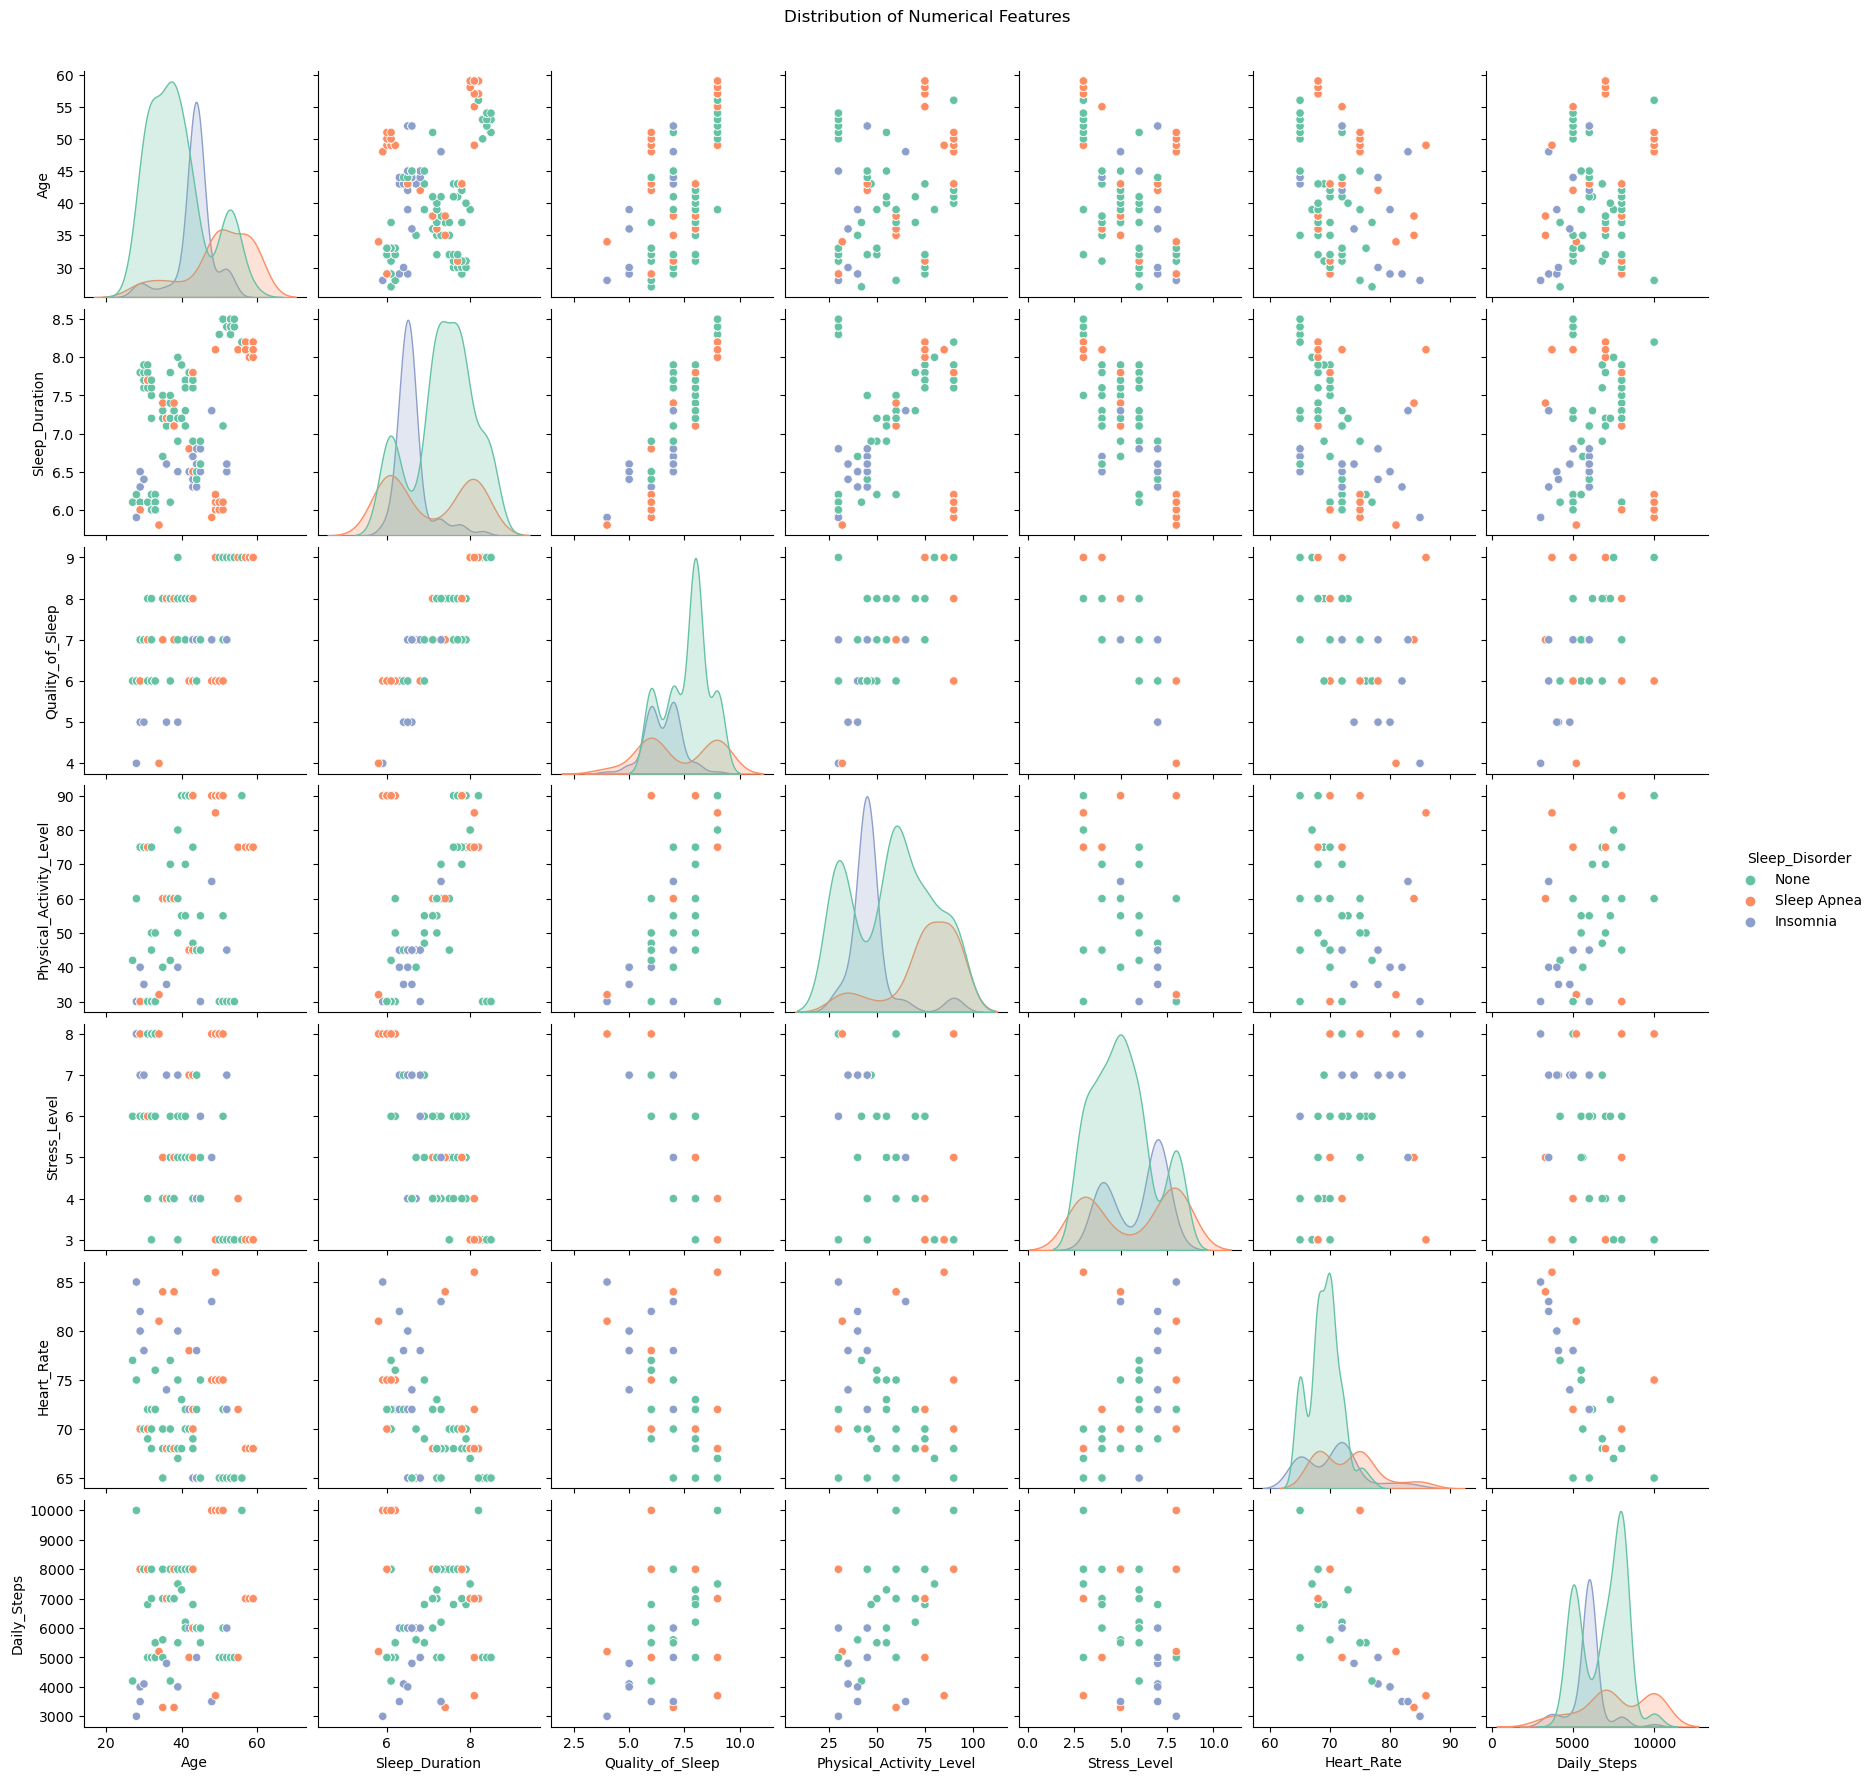

In [67]:
# Pairplot to see relationships between numerical features
sns.pairplot(df, hue='Sleep_Disorder', diag_kind='kde', palette='Set2')
plt.suptitle('Distribution of Numerical Features', y=1.02)
plt.show();

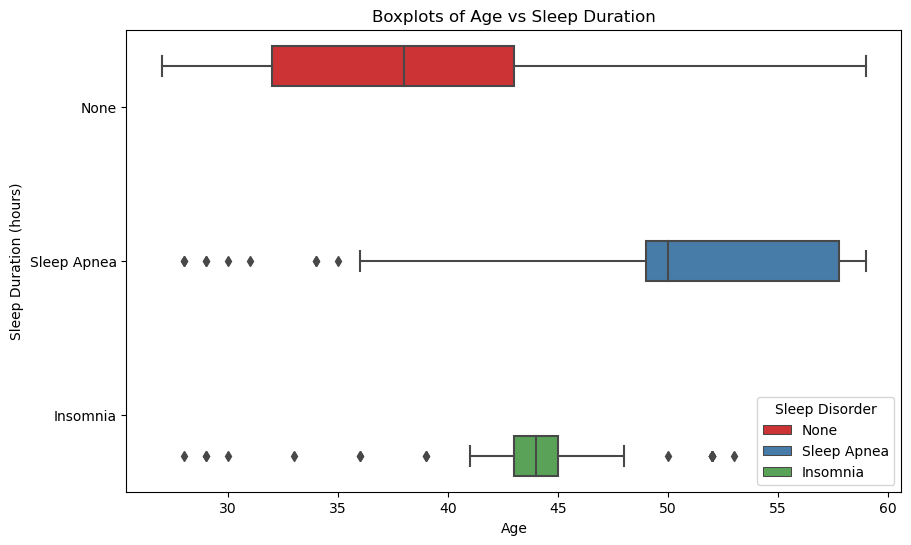

In [68]:
# Distribution of `Age` vs `Sleep_Durations`
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Age', y='Sleep_Disorder', hue='Sleep_Disorder', palette='Set1')
plt.title('Boxplots of Age vs Sleep Duration')
plt.xlabel('Age')
plt.ylabel('Sleep Duration (hours)')
plt.legend(title='Sleep Disorder')
plt.show();

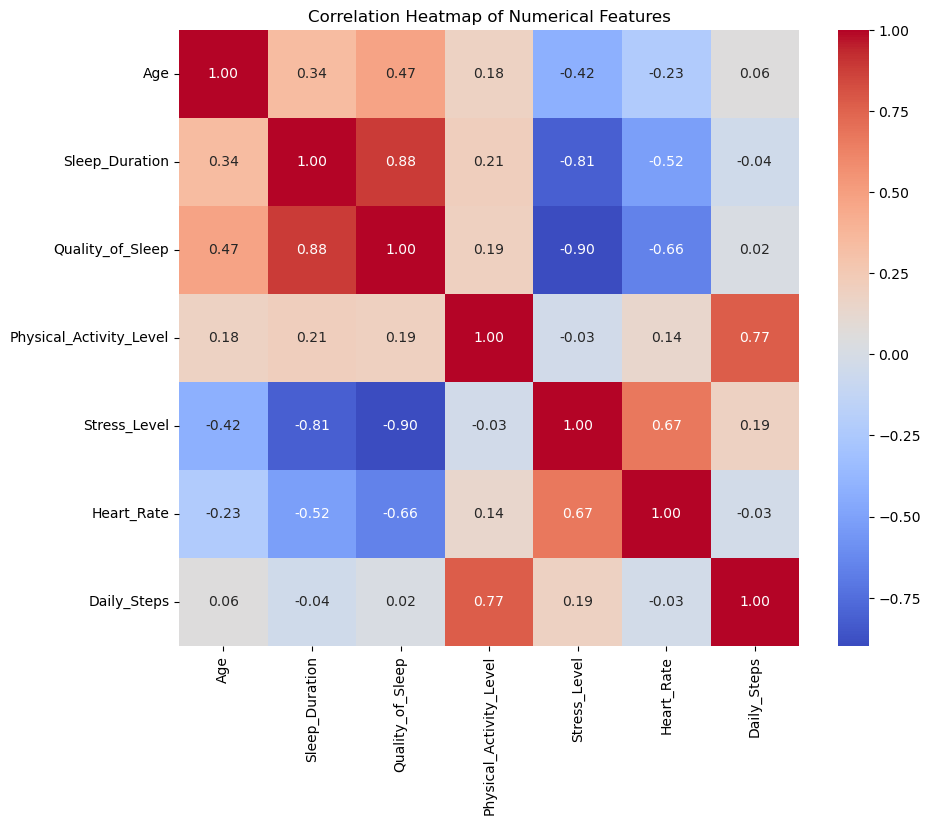

In [69]:
# Correlation matrix and heatmap for numerical features without the first column
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
corr_matrix = df[num_cols].corr()
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show();

- Presence of strong correlation between:
    - `Quality_of_Sleep` and `Sleep_Duration`
    - `Daily_Steps` and `Physical_Activity_Level`
    - `Stress_Level` and `Heart_Rate`
- There is a weak correlation between `Age` and `Quality_of_Sleep`

# Feature Engineering


In [70]:
# Encode `Gender` column Male:1, Female:2
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 2})

In [71]:
# Split blood pressure into systolic and diastolic
df[['Systolic_BP', 'Diastolic_BP']] = df['Blood_Pressure'].str.split('/', expand=True).astype(int)
df.drop(columns=['Blood_Pressure'], inplace=True)

# Convert Systolic and Diastolic BP to numeric
df['Systolic_BP'] = pd.to_numeric(df['Systolic_BP'], errors='coerce')
df['Diastolic_BP'] = pd.to_numeric(df['Diastolic_BP'], errors='coerce')

# Claculate Pulse Pressure
df['Pulse_Pressure'] = df['Systolic_BP'] / df['Diastolic_BP']

In [72]:
# Encode `Occupation` column
occupation_mapping = {occupation: idx + 1 for idx, occupation in enumerate(df['Occupation'].unique())}
df['Occupation'] = df['Occupation'].map(occupation_mapping) # Start encoding from 1
df['Occupation']

Person ID
1      1
2      2
3      2
4      3
5      3
      ..
370    5
371    5
372    5
373    5
374    5
Name: Occupation, Length: 374, dtype: int64

In [73]:
# Encode BMI_Category column
bmi_mapping = {'Underweight': 1, 'Normal': 2, 'Overweight': 3, 'Obese': 4}
df['BMI_Category'] = df['BMI_Category'].map(bmi_mapping)

In [74]:
# Encode `Sleep_Disorder` column
df['Sleep_Disorder'] = df['Sleep_Disorder'].map({'None': 1, 'Insomnia': 2, 'Sleep Apnea': 3})

In [75]:
df['BMI_Category'].unique()

array([3, 2, 4], dtype=int64)

In [76]:
df['Occupation'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int64)

In [78]:
df.head()

,Gender,Age,Occupation,Sleep_Duration,Quality_of_Sleep,Physical_Activity_Level,Stress_Level,BMI_Category,Heart_Rate,Daily_Steps,Sleep_Disorder,Systolic_BP,Diastolic_BP,Pulse_Pressure
Person ID,,,,,,,,,,,,,,
1,1,27,1,6.1,6,42,6,3,77,4200,1,126,83,1.518072
2,1,28,2,6.2,6,60,8,2,75,10000,1,125,80,1.562500
3,1,28,2,6.2,6,60,8,2,75,10000,1,125,80,1.562500
4,1,28,3,5.9,4,30,8,4,85,3000,3,140,90,1.555556
5,1,28,3,5.9,4,30,8,4,85,3000,3,140,90,1.555556


In [79]:
# df.drop(columns=['Person_ID'], inplace=True)
# df.head()

# Modelling

In [ ]:
# Split the data
# X = df.drop('Sleep_Disorder', axis=1)
X = df[['Gender', 'Age', 'Occupation', 'Sleep_Duration', 'Quality_of_Sleep', 'Physical_Activity_Level', 'Stress_Level', 'BMI_Category', 'Heart_Rate', 'Daily_Steps', 'Systolic_BP', 'Diastolic_BP']]
y = df['Sleep_Disorder']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((299, 12), (75, 12), (299,), (75,))

In [84]:
X_test

,Gender,Age,Occupation,Sleep_Duration,Quality_of_Sleep,Physical_Activity_Level,Stress_Level,BMI_Category,Heart_Rate,Daily_Steps,Systolic_BP,Diastolic_BP
Person ID,,,,,,,,,,,,
69,2,33,8,6.2,6,50,6,3,76,5500,128,85
59,1,32,2,6.0,6,30,8,2,72,5000,125,80
81,2,34,8,5.8,4,32,8,3,81,5200,131,86
271,2,49,5,6.1,6,90,8,3,75,10000,140,95
61,1,32,2,6.0,6,30,8,2,72,5000,125,80
...,...,...,...,...,...,...,...,...,...,...,...,...
22,1,30,2,7.7,7,75,6,2,70,8000,120,80
175,1,41,9,7.6,8,90,5,2,70,8000,130,85
194,1,43,10,6.5,6,45,7,3,72,6000,130,85


In [85]:
# Instatiate models
models = {
    "Support Vector Machine": SVC(random_state=RANDOM_SEED),
    "Decision Tree": DecisionTreeClassifier(random_state=RANDOM_SEED),
    "Random Forest": RandomForestClassifier(random_state=RANDOM_SEED)
}

Model: Support Vector Machine


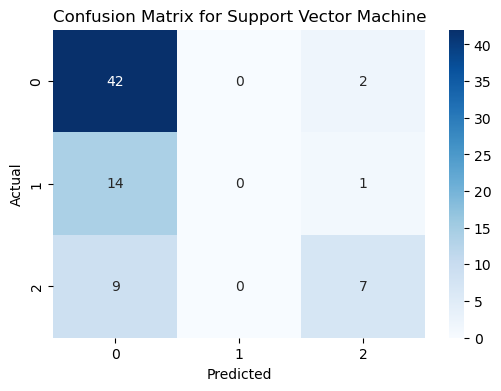


Classification Report:
              precision    recall  f1-score   support

           1       0.65      0.95      0.77        44
           2       0.00      0.00      0.00        15
           3       0.70      0.44      0.54        16

    accuracy                           0.65        75
   macro avg       0.45      0.46      0.44        75
weighted avg       0.53      0.65      0.57        75

Model: Decision Tree


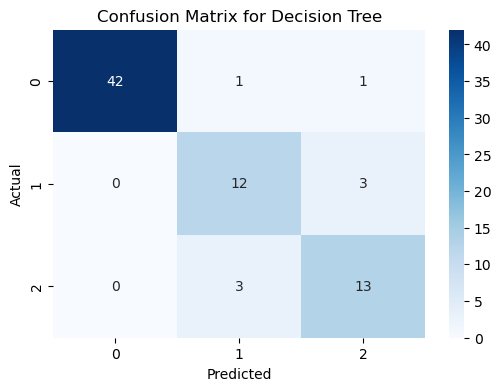


Classification Report:
              precision    recall  f1-score   support

           1       1.00      0.95      0.98        44
           2       0.75      0.80      0.77        15
           3       0.76      0.81      0.79        16

    accuracy                           0.89        75
   macro avg       0.84      0.86      0.85        75
weighted avg       0.90      0.89      0.90        75

Model: Random Forest


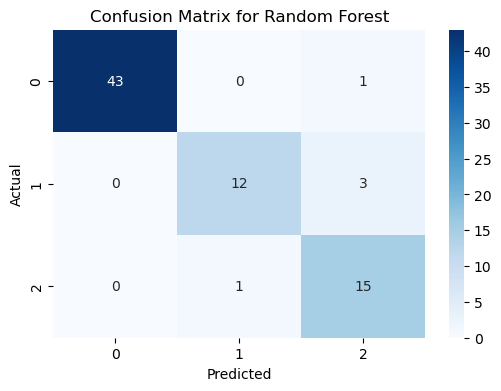


Classification Report:
              precision    recall  f1-score   support

           1       1.00      0.98      0.99        44
           2       0.92      0.80      0.86        15
           3       0.79      0.94      0.86        16

    accuracy                           0.93        75
   macro avg       0.90      0.90      0.90        75
weighted avg       0.94      0.93      0.93        75



In [ ]:
# Train and evaluate models
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)    
    print(f"Model: {model_name}")
    
    # Visualize confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show();
    
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    # Save the model
    joblib.dump(model, f"{model_name.replace(' ', '_').lower()}_model.pkl")

In [ ]:
# Save the SVC model
# joblib.dump(models["Support Vector Machine"], "svc_model.pkl")

# joblib.dump(models["Decision Tree"], "decision_tree_model.pkl")

# Save the model
# joblib.dump(model, f"{model_name.replace(' ', '_').lower()}_model.pkl")
